In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os

In [75]:
DATA_PATH="./data/10/"
labels=os.listdir(DATA_PATH)

In [76]:
def speech2mfcc(file_path,max_len=11):
	wave, sr= librosa.load(file_path, mono=True, sr=None)
	wave=wave[::5]
	mfcc=librosa.feature.mfcc(wave,sr=sr)
#	print(mfcc)
	if (max_len > mfcc.shape[1]): #.shape[1], 1-->column
		pad_width=max_len-mfcc.shape[1]
		mfcc=np.pad(mfcc,pad_width=((0,0),(0,pad_width)),mode='constant')

	else:
		mfcc=mfcc[:,:max_len]
#	print(mfcc.shape)
	return mfcc

In [77]:
mfcc_vectors=[]

for speech in labels:
    mfcc=speech2mfcc(DATA_PATH+speech)
    mfcc_vectors.append(mfcc)

In [78]:
mfcc_total=[]
for n_mf,_ in enumerate(mfcc_vectors[1]):
#    print('n_mf='+repr(n_mf))
    mfcc_i=mfcc_vectors[0][n_mf,]
    for i,_ in enumerate(mfcc_vectors[1:]):
#        print('i='+repr(i))
        mfcc_i=np.vstack((mfcc_i,mfcc_vectors[i+1][n_mf,]))
    mfcc_total.append(mfcc_i)

In [79]:
for j,_ in enumerate(mfcc_total):
    mfcc_total[j][mfcc_total[j] ==0]=np.nan

In [80]:
std_total=np.nanstd(mfcc_total,axis=1)

In [81]:
mfcc_avg=np.average(std_total,axis=1)

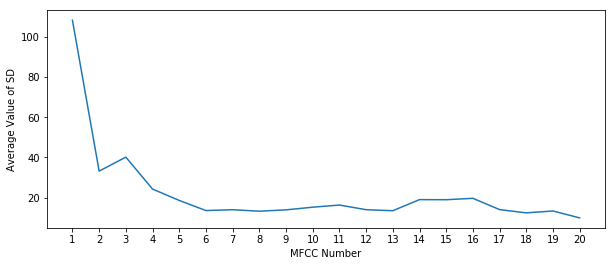

In [82]:
mfcc_number=range(1,21)
plt.figure(figsize=(10,4))
plt.plot(mfcc_number,mfcc_avg)
plt.xticks(mfcc_number)
plt.xlabel('MFCC Number')
plt.ylabel('Average Value of SD')
#plt.title('Average value of standard deviation')
plt.savefig('mfcc_avg_sd_10.svg',format='svg', dpi=1200)
#np.save('mfcc_average.npy',mfcc_avg)